# Internship Project: Handwritten Digit Recognition using MNIST

**Name**: Kritik Mahesh  
**Institution**: Manipal Academy of Higher Education, Dubai  
**Platform**: Google Colab  
**Framework**: TensorFlow + Keras

---

###  Project Objective:
To build a neural network model capable of recognizing handwritten digits (0–9) from the MNIST dataset using a Convolutional Neural Network (CNN). The model is trained, evaluated, and visualized to analyze performance and prediction accuracy.

This notebook includes:
- Data preprocessing & normalization  
- CNN architecture building and training  
- Evaluation using test accuracy and confusion matrix  
- Visualization of predicted digits

---


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train,epochs=5,batch_size=64,validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8834 - loss: 0.3838 - val_accuracy: 0.9843 - val_loss: 0.0574
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9821 - loss: 0.0578 - val_accuracy: 0.9857 - val_loss: 0.0465
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9886 - loss: 0.0372 - val_accuracy: 0.9883 - val_loss: 0.0392
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9918 - loss: 0.0269 - val_accuracy: 0.9910 - val_loss: 0.0346
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9944 - loss: 0.0186 - val_accuracy: 0.9872 - val_loss: 0.0470


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9845 - loss: 0.0434
Test Accuracy: 98.81%


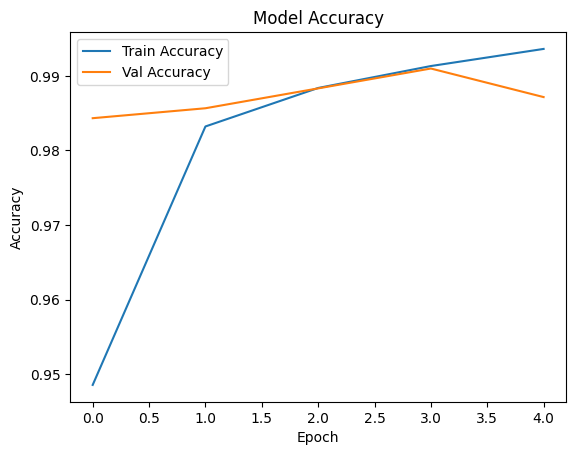

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


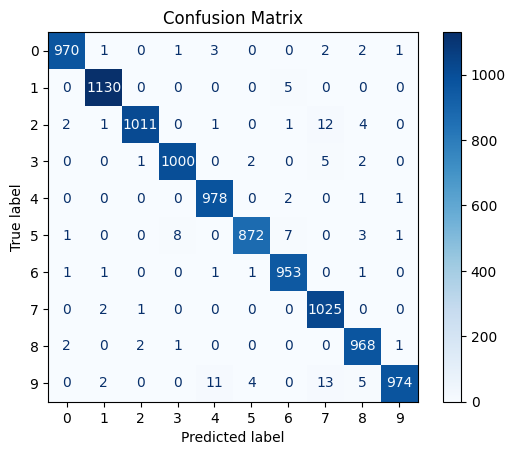

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## Predict and Visualize Some Test Digits

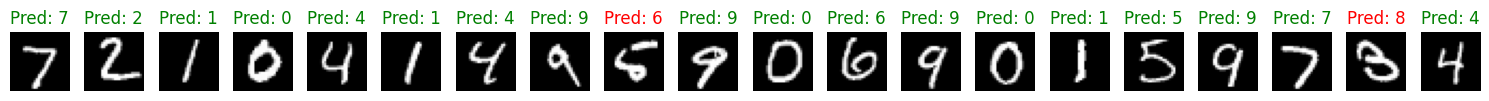

In [19]:
# Visualize Model Predictions on Sample Test Images

# Number of images to display
num_images = 20

# Set the figure size
plt.figure(figsize=(15, 4))

# Loop through and plot each image with its prediction
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    # Set title color based on prediction correctness
    title_color = 'green' if y_pred[i] == y_true[i] else 'red'
    plt.title(f"Pred: {y_pred[i]}", color=title_color)
    plt.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## New Feature: Predict Your Own Handwritten Digit
This allows users to upload their own digit image (e.g., a JPG or PNG) and see what the model predicts.

Saving Number 8 image.png to Number 8 image.png

Predicting digit for: Number 8 image.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


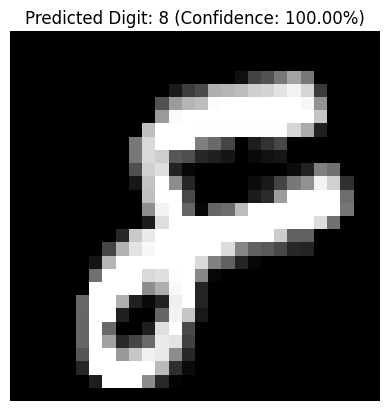

In [13]:
# Extra Feature: Predict Your Own Handwritten Digit

import cv2
import numpy as np
import matplotlib.pyplot as plt

#  Function to preprocess custom image
def preprocess_user_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = 255 - img  # Invert to match MNIST white-on-black format
    img = img / 255.0
    return img.reshape(1, 28, 28, 1)

#  Predict and display result
def predict_digit(image_path):
    img = preprocess_user_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.title(f"Predicted Digit: {predicted_class} (Confidence: {100 * np.max(prediction):.2f}%)")
    plt.axis('off')
    plt.show()

from google.colab import files

#  Step 1: Upload a custom image file
uploaded = files.upload()

#  Step 2: Run prediction on the uploaded file
for fn in uploaded.keys():
    print(f"\nPredicting digit for: {fn}")
    predict_digit(fn)
